<p style="padding:15px;
          background-color:#DFBB9D;
          margin:0;
          color:#FFF5E1;
          font-family:newtimeroman;
          font-weight: bold;
          font-size:250%;
          text-align:center;
          border-radius: 15px 50px;
          overflow:hidden;
          font-weight:500">Analyzing dogs breeds</p>

# Introduction

<div style="float:right;align:left;margin-left:10px;font-family:NewCenturySchoolbook;font-size:20px;">In this notebook I'd like to analyze the dogs breeds dataset.

The code is be hidden, but you can open it by clicking on the "Show code" button.</div>

In [3]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show code</button>''', raw=True)

Show code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

In [3]:
all_dogs = pd.read_csv("/kaggle/input/dog-breeds/dog_breeds.csv")

<div style="float:left;margin-left:10px;font-family:NewCenturySchoolbook;font-size:20px;display:block;">This is what the dataset looks like. </div>

In [4]:
all_dogs.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"


<div style="float:right; margin-right:30px;max-width:40%;">
        <img src="https://media.tenor.com/8M_dytzny2QAAAAC/my-puppies.gif">
    </div>
    
<div style="float:left;align:center;margin-right:10px;font-family:NewCenturySchoolbook;font-size:20px;display:inline-block;">
To start with, I'd like to split these two<br>columns:<br>Character Traits and Common Health <br>Problems <br>so that I could easier sort different breeds <br>based on their specific traits.
    </div>

In [5]:
array = all_dogs["Common Health Problems"].unique()

<div style="float:left;align:left;font-family:NewCenturySchoolbook;font-size:20px;">These are the steps I would need to take:

<ul>1. extract unique values from the column</ul>
<ul>2. split them into separate values</ul>
<ul>3. set all the values into lower case</ul>
<ul>4. create columns which each of the unique values</ul>
<ul>5. add a 1 if the value exists in the original column or 0 if it doesn't</ul>
<ul>6. delete the original column</ul>

I will do the same steps for both the columns</div>

<div style="float:left;align:left;font-family:NewCenturySchoolbook;font-size:20px;">Extracting unique values</div>

In [6]:
unique_values = set()

for value in array:
    values = value.split(', ')
    for v in values:
        unique_values.add(v)

print(unique_values)

{'eye issues', 'pancreatitis', 'Intervertebral disc disease', 'bladder stones', 'Skin allergies', 'hereditary myopathy', 'skin allergies', 'heart conditions', 'respiratory issues', 'Eye problems', 'eye problems', 'elbow dysplasia', 'Breathing problems', 'ear infections', 'Dental problems', 'obesity', 'cancer', 'epilepsy', 'diabetes', 'Hip dysplasia', 'Ear infections', 'hip dysplasia'}


<div style="float:left;align:left;font-family:NewCenturySchoolbook;font-size:20px;">Turning them into lower case values </div>

In [7]:
lowercase_values = set()

for value in unique_values:
    lowercase_values.add(value.lower())

print(lowercase_values)

{'bladder stones', 'dental problems', 'breathing problems', 'eye issues', 'ear infections', 'hip dysplasia', 'cancer', 'epilepsy', 'hereditary myopathy', 'skin allergies', 'eye problems', 'diabetes', 'pancreatitis', 'heart conditions', 'respiratory issues', 'elbow dysplasia', 'intervertebral disc disease', 'obesity'}


<div style="float:left;align:left;font-family:NewCenturySchoolbook;font-size:20px;"> Creating new columns and filling it with the values</div>

In [8]:
all_dogs['Common Health Problems'] = all_dogs['Common Health Problems'].str.lower()

In [9]:
for value in lowercase_values:
    all_dogs[value] = all_dogs["Common Health Problems"].apply(lambda x: 1 if value in x else 0)


In [10]:
all_dogs = all_dogs.drop(columns=["Common Health Problems"])

In [11]:
character = all_dogs["Character Traits"].unique()


In [12]:
unique_char = set()

for char in character:
    chars = char.split(', ')
    for c in chars:
        unique_char.add(c)

In [13]:
lower_char = set()

for char in unique_char:
    lower_char.add(char.lower())

In [14]:
all_dogs["Character Traits"] = all_dogs["Character Traits"].str.lower()

In [15]:
for value in lower_char:
    all_dogs[value] = all_dogs["Character Traits"].apply(lambda x: 1 if value in x else 0)

<div style="float:left;align:left;font-family:NewCenturySchoolbook;font-size:20px;">Checking the result</div>

In [16]:
all_dogs = all_dogs.drop(columns = ["Character Traits"])
all_dogs

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),bladder stones,dental problems,breathing problems,eye issues,...,sensitive,energetic,charming,strong,athletic,kind,curious,calm,loyal,confident
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,Bulldog,England,"White, Red",12-16,Brown,8-10,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Catahoula Leopard Dog,United States,"Merle, Black",20-26,Brown,12-14,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
113,Cocker Spaniel,England,"Black, Brown",14-15,Brown,12-15,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
114,Miniature Shiba Inu,Japan,"Red, Sesame",13-16,Brown,12-15,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
115,Belgian Tervuren,Belgium,Fawn,22-26,Brown,12-14,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


# Filtering

<div style="float:left;align:center;margin-right:10px;font-family:NewCenturySchoolbook;font-size:20px;display:inline-block;">Now we can easily filter the dataframe for character traits and health issues</div>

In [17]:
loyal_no_spec_problems = all_dogs[(all_dogs["loyal"] == 1)&
                           (all_dogs["heart conditions"] == 0) &
                          (all_dogs["dental problems"] == 0) &
                          (all_dogs["skin allergies"] == 0) &
                          (all_dogs["eye problems"] == 0)]

loyal_no_spec_problems

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),bladder stones,dental problems,breathing problems,eye issues,...,sensitive,energetic,charming,strong,athletic,kind,curious,calm,loyal,confident
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,Rottweiler,Germany,"Black, Tan",22-27,Brown,8-10,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
11,Dachshund,Germany,"Black, Tan",5-9,"Brown, Blue",12-15,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


<div style = "float:right; margin-right:30px;">
    <img src="https://media.tenor.com/m7sj8Vb0DlsAAAAC/dogs-cute.gif"></div>

<div style="float:left;align:center;margin-right:10px;font-family:NewCenturySchoolbook;font-size:20px;display:inline-block;"> Very well! <br> Now I'd like to <br>create a visualization <br> to see if there's any dependancy <br> between how big a dog is <br> and how long a dog lives </div>

<div style="float:left;align:center;margin-right:10px;font-family:NewCenturySchoolbook;font-size:20px;display:inline-block;">
I'll filter the dogs by country, I'll study breeds from Germany</div>

In [18]:
germ_dogs = all_dogs[all_dogs["Country of Origin"] == "Germany"]

In [19]:
germ_dogs = germ_dogs.rename(columns={"Height (in)": "Height"})

In [20]:
germ_dogs_copy = germ_dogs.copy()
germ_dogs_copy['Longevity (yrs)'] = germ_dogs_copy['Longevity (yrs)'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

In [21]:
germ_dogs_copy['Height'] = germ_dogs_copy['Height'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

In [22]:
sns.set(rc={"axes.facecolor":"#F0E9D2","figure.facecolor":"#F0E9D2"})

# Plotting the data

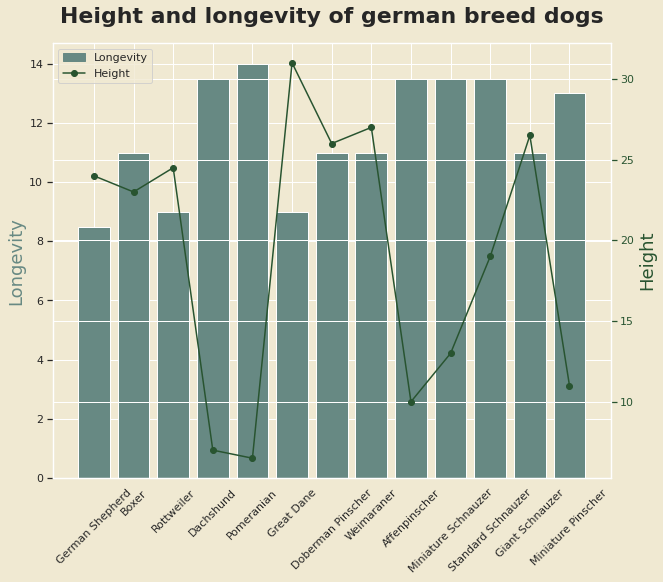

In [23]:
fig,ax = plt.subplots(figsize = (10,8))

sns.set(rc={"axes.facecolor":"#F0E9D2","figure.facecolor":"#F0E9D2"})

# bar plot

ax.bar(germ_dogs_copy["Breed"], germ_dogs_copy["Longevity (yrs)"], color="#678983", label="Longevity")
plt.xticks(germ_dogs_copy["Breed"], rotation = 45)
ax.set_ylabel("Longevity", size = 18, c = "#678983")

# line plot


ax1 = ax.twinx()

ax1.set_ylabel("Height",size = 18, c = "#285430" )
ax1.tick_params(axis = "y",
               colors = "#285430")    # setting color of the ticks and label as the line color

ax1.plot(range(len(germ_dogs_copy)), germ_dogs_copy["Height"],
         color="#285430",
        marker = "o",
        label = "Height")

#ax.set_xticklabels(germ_dogs_copy['Breed'], rotation=45)

ax1.set_ylabel("Height",size = 18, c = "#285430" )

plt.title("Height and longevity of german breed dogs", fontsize = 22, fontweight = "bold", fontname = "Silom", pad=20)


# adding a legend
long_patch = mpatches.Patch(color = "#678983", label='Longevity')
height_line = mlines.Line2D([], [], color='#285430', label='Height', marker = "o")
plt.legend(handles=[long_patch, height_line], loc='upper left')




plt.show()  

# Regression

<div style="float:left;align:left;margin-left:10px;font-family:NewCenturySchoolbook;font-size:20px;"> Looks like smaller dogs tend to live a bit longer. I'd like to do a linear regression analysis.</div>

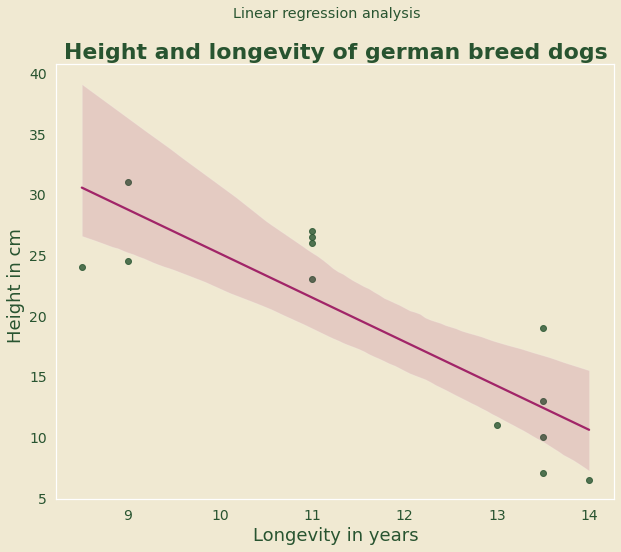

In [24]:
plt.figure(figsize=(10,8))

sns.regplot(germ_dogs_copy["Longevity (yrs)"], 
            germ_dogs_copy["Height"], 
            scatter_kws={"color":"#285430"}, 
            line_kws={"color":"#A12568"})

sns.set(rc={"axes.facecolor":"#F0E9D2","figure.facecolor":"#F0E9D2"})

plt.title("Height and longevity of german breed dogs", 
          size = 22, 
          fontweight= "bold", 
          fontname="Oswald", 
          c = "#285430")

plt.suptitle("Linear regression analysis", 
             fontname="Oswald", 
             c = "#285430")

plt.ylabel("Height in cm ",size = 18, c = "#285430")
plt.xlabel("Longevity in years", size = 18, c = "#285430")
plt.xticks(c = "#285430", size = 14)
plt.yticks(c = "#285430", size = 14)


plt.grid(False)
plt.show()

<div style="float:left;align:left;margin-left:10px;font-family:NewCenturySchoolbook;font-size:20px;"> Just looking at the plot sometimes isn't enough, we can also calculate the correlation coefficient (r). </div>

In [25]:

# Extract the height and longevity columns
height = germ_dogs_copy["Height"]
longevity = germ_dogs_copy["Longevity (yrs)"]

# Calculate the correlation coefficient
r, p = pearsonr(height, longevity)


print(r)

-0.8430336741783675


# Conclusion

<div style="float:left;align:left;margin-left:10px;font-family:NewCenturySchoolbook;font-size:20px;">Our correlation coefficient is equal to -0.8430336741783675 which indicates strong negative correlation.

Based on the data and this analysis we can say that for the breeds mentioned in the dataset and the data provided, there's a strong correlation between height and longevity suggesting that smaller dogs on average tend to live longer.</div>